In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#load dataset

In [7]:
df=pd.read_csv("/content/all_data.csv")

In [8]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 527,Unnamed: 528,Unnamed: 529,Unnamed: 530,Unnamed: 531,Unnamed: 532,Unnamed: 533,Unnamed: 534,Unnamed: 535,Label
0,-0.000133,0.000262,0.001099,0.001834,0.002109,0.002223,0.002233,0.002036,0.001582,0.000969,...,0.82953,2.9079,3.7557,1.3344,0.74247,0.22507,0.56249,1.5705,0.79906,0
1,-0.000842,-0.001011,-0.001071,-0.000944,-0.000794,-0.000610,-0.000445,-0.000173,0.000077,0.000285,...,0.84335,3.0110,3.9877,1.2461,0.74423,0.22567,0.61034,1.6645,0.74574,0
2,-0.000766,-0.000535,0.000162,0.000898,0.001287,0.001582,0.001704,0.001659,0.001574,0.001438,...,0.87413,3.0613,3.9749,1.1560,0.52508,0.19934,0.45707,1.3386,0.74574,0
3,-0.000301,-0.000377,-0.000451,-0.000529,-0.000685,-0.000845,-0.000899,-0.000822,-0.000550,-0.000182,...,0.85467,3.3337,3.9205,1.3341,0.46024,0.20031,0.45924,1.7969,0.32451,0
4,-0.000589,-0.000857,-0.001135,-0.001171,-0.001128,-0.001039,-0.000959,-0.000937,-0.000916,-0.000819,...,0.82978,3.5814,3.7667,1.1151,0.44572,0.20538,0.41882,1.4422,0.32451,0


In [14]:
#check column size and rows
rows, cols = df.shape[0], df.shape[1]

print(f'Rows: {rows}')
print(f'Columns: {cols}')

Rows: 230
Columns: 537


In [15]:
X=df.drop(columns='Label',axis=1)
y=df['Label']

In [17]:
y.value_counts()

,count
Label,
0,115
1,115


##***Dimensionality reduction techniques***

In [23]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

#apply PCA

In [32]:
pca = PCA(n_components =10, random_state = 1234)

X_pca = pca.fit_transform(X_scaler)

In [33]:
X_pca.shape

(230, 10)

In [34]:
X_pca

array([[ 1.37507702, -8.06348199, -2.00746692, ..., -3.14290559,
         5.81127919,  1.47386705],
       [ 0.67987748,  1.45845178, -2.34419918, ...,  0.57426187,
         4.8531987 ,  3.29917586],
       [ 1.74793182, -6.87415705, -2.79060361, ..., -5.28044439,
         2.63692978,  2.524712  ],
       ...,
       [-8.18912061,  0.42646109,  4.25135787, ...,  4.37858694,
         1.68684855,  0.13846363],
       [-0.28161647,  5.23911088, -0.39319645, ...,  6.10132536,
        -0.22307331, 11.13039657],
       [-1.40351884,  3.5302552 ,  3.22790515, ..., -1.97263437,
        -0.37428384, -2.64650418]])

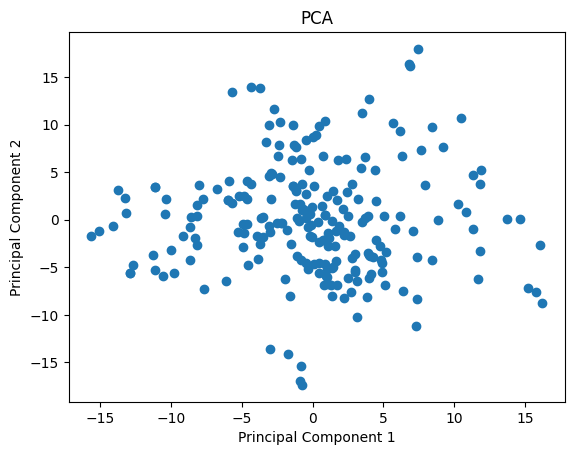

In [35]:
# Plot PCA results between c1 an pc2
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [44]:
# Convert PCA array to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Display the DataFrame
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.375077,-8.063482,-2.007467,-1.198820,-0.306645,-1.712125,1.693401,-3.142906,5.811279,1.473867
1,0.679877,1.458452,-2.344199,0.057312,-5.393252,-0.564560,0.803668,0.574262,4.853199,3.299176
2,1.747932,-6.874157,-2.790604,0.077453,2.283759,-2.624529,0.169603,-5.280444,2.636930,2.524712
3,1.088650,-1.362856,-3.638178,2.817223,0.516551,-1.670064,2.204933,-2.988983,2.702753,3.414478
4,1.577634,-2.713399,-1.113626,0.560410,1.071306,-1.589694,-0.308125,-1.724529,4.425775,2.203907


In [41]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(184, 10)

In [46]:
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
150,-8.148856,-2.635161,11.549338,-3.989791,5.597912,-1.106180,1.793130,2.042744,1.705751,-4.885986
55,-11.134399,3.476070,-11.002172,-6.226732,5.464505,-2.365977,-5.513089,2.443986,1.572256,-7.067773
165,0.702789,6.658131,10.241853,-2.560823,1.019236,4.348111,-4.810786,-5.069632,-0.347439,1.283978
69,-5.938339,2.105051,11.614087,14.356549,-7.662797,-5.659689,1.375542,7.117742,6.326847,-11.733742
167,-3.471280,0.239926,0.796258,4.631939,10.350519,4.350484,-4.230975,6.312844,4.645092,4.507686


In [50]:
# apply rfc the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# Predict on the test set
y_pred = model.predict(X_test)

In [58]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy after pca: {accuracy*100:.2f}%")

Model Accuracy after pca: 89.13%
